In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import ttest_ind, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Show full column names

In [10]:
df = pd.read_csv('Cleaned_hostel_dataset.csv')

In [34]:
df.head()

,gender,year_study,current_stay,preference,pref_reasons,pref_afford,pref_proximity,pref_social,pref_amenities,pref_security,change_accommodation,satisfaction,prefer_closer,distance_affects_attendance,commute_mode,commute_walk,commute_bike,commute_bus,commute_taxi,proximity_focus,funding_source,changed_before,less_pref_due_cost,amenities_list,amenity_water,amenity_electricity,amenity_internet,amenity_laundry,amenity_aircon,amenity_cleanbath,issues_basic_services,water_supply,electricity_supply,internet_access,room_cleanliness,bathroom_facility,hostel_management,study_space_conducive,env_collaboration,social_influence,rating,security_personnel,security_cctv,security_fencing,security_checkin,security_none,experienced_theft,security_confidence,focus_feeling,mental_health,consistent_study_routine,study_elsewhere,study_hours
0,Male,4,Off-Campus,Off-campus hostel,"Affordability Proximity to lecture halls Availability of amenities (Wi-Fi, water, etc.)",1,1,0,1,0,No,5,No,Not at all,Walking,1,0,0,0,3,Parents/Guardians,Yes,No,Water Electricity Internet Air conditioning/Fans Clean bathroom Facilities,1,1,1,0,1,1,Rarely,4,5,3,4,4,5,Yes,4,No,4,0,1,1,0,0,No,Very good,4,4,Yes,Yes,5
1,Male,4,Off-Campus,On-campus hostel,"Proximity to lecture halls Access to social life Availability of amenities (Wi-Fi, water, etc.) Security",0,1,1,1,1,Yes,3,No,Sometimes,Walking,1,0,0,0,4,Parents/Guardians,No,Yes,Water Electricity Internet Air conditioning/Fans Clean bathroom Facilities,1,1,1,0,1,1,Occasionally,4,3,2,3,2,3,No,2,Yes,4,0,0,1,0,0,Yes,Poor,3,3,Sometimes,Yes,3
2,Female,4,Off-Campus,Off-campus hostel,Affordability Access to social life,1,0,1,0,0,No,5,No,Sometimes,Walking,1,0,0,0,3,Parents/Guardians,Yes,No,Water Electricity Internet Clean bathroom Facilities,1,1,1,0,0,1,Rarely,4,5,3,5,5,4,Not available foruse,3,No,4,0,0,1,0,0,No,Excellent,5,4,Yes,No,3
3,Male,4,Off-Campus,Off-campus hostel,"Affordability Proximity to lecture halls Access to social life Availability of amenities (Wi-Fi, water, etc.) Security",1,1,1,1,1,Maybe,3,No,Not at all,Walking Shuttle/Bus,1,0,1,0,4,Parents/Guardians,Yes,No,Water Electricity Internet Clean bathroom Facilities,1,1,1,0,0,1,Occasionally,4,3,4,4,5,3,Yes,5,Yes,5,0,1,1,0,0,No,Very good,4,4,Yes,No,4
4,Female,4,Off-Campus,On-campus hostel,"Availability of amenities (Wi-Fi, water, etc.)",0,0,0,1,0,Yes,4,No,Sometimes,Walking,1,0,0,0,5,Parents/Guardians,No,Yes,Electricity,0,1,0,0,0,0,Frequently,3,5,3,2,1,1,Yes,5,Yes,5,0,0,0,0,1,Yes,Poor,3,3,Sometimes,No,3


In [12]:
# Copy dataframe so we don't overwrite original
df_encoded = df.copy()

# Select object/string columns (categorical)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Convert each categorical column to numeric codes
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded.head()

,gender,year_study,current_stay,preference,pref_reasons,pref_afford,pref_proximity,pref_social,pref_amenities,pref_security,change_accommodation,satisfaction,prefer_closer,distance_affects_attendance,commute_mode,commute_walk,commute_bike,commute_bus,commute_taxi,proximity_focus,funding_source,changed_before,less_pref_due_cost,amenities_list,amenity_water,amenity_electricity,amenity_internet,amenity_laundry,amenity_aircon,amenity_cleanbath,issues_basic_services,water_supply,electricity_supply,internet_access,room_cleanliness,bathroom_facility,hostel_management,study_space_conducive,env_collaboration,social_influence,rating,security_personnel,security_cctv,security_fencing,security_checkin,security_none,experienced_theft,security_confidence,focus_feeling,mental_health,consistent_study_routine,study_elsewhere,study_hours
0,1,4,0,0,15,1,1,0,1,0,1,5,1,0,4,1,0,0,0,3,0,1,0,14,1,1,1,0,1,1,3,4,5,3,4,4,5,2,4,0,4,0,1,1,0,0,0,4,4,4,2,1,5
1,1,4,0,1,24,0,1,1,1,1,2,3,1,1,4,1,0,0,0,4,0,0,1,14,1,1,1,0,1,1,2,4,3,2,3,2,3,0,2,1,4,0,0,1,0,0,1,3,3,3,1,1,3
2,0,4,0,0,4,1,0,1,0,0,1,5,1,1,4,1,0,0,0,3,0,1,0,15,1,1,1,0,0,1,3,4,5,3,5,5,4,1,3,0,4,0,0,1,0,0,0,0,5,4,2,0,3
3,1,4,0,0,13,1,1,1,1,1,0,3,1,0,7,1,0,1,0,4,0,1,0,15,1,1,1,0,0,1,2,4,3,4,4,5,3,2,5,1,5,0,1,1,0,0,0,4,4,4,2,0,4
4,0,4,0,1,19,0,0,0,1,0,2,4,1,1,4,1,0,0,0,5,0,0,1,1,0,1,0,0,0,0,0,3,5,3,2,1,1,2,5,1,5,0,0,0,0,1,1,3,3,3,1,0,3


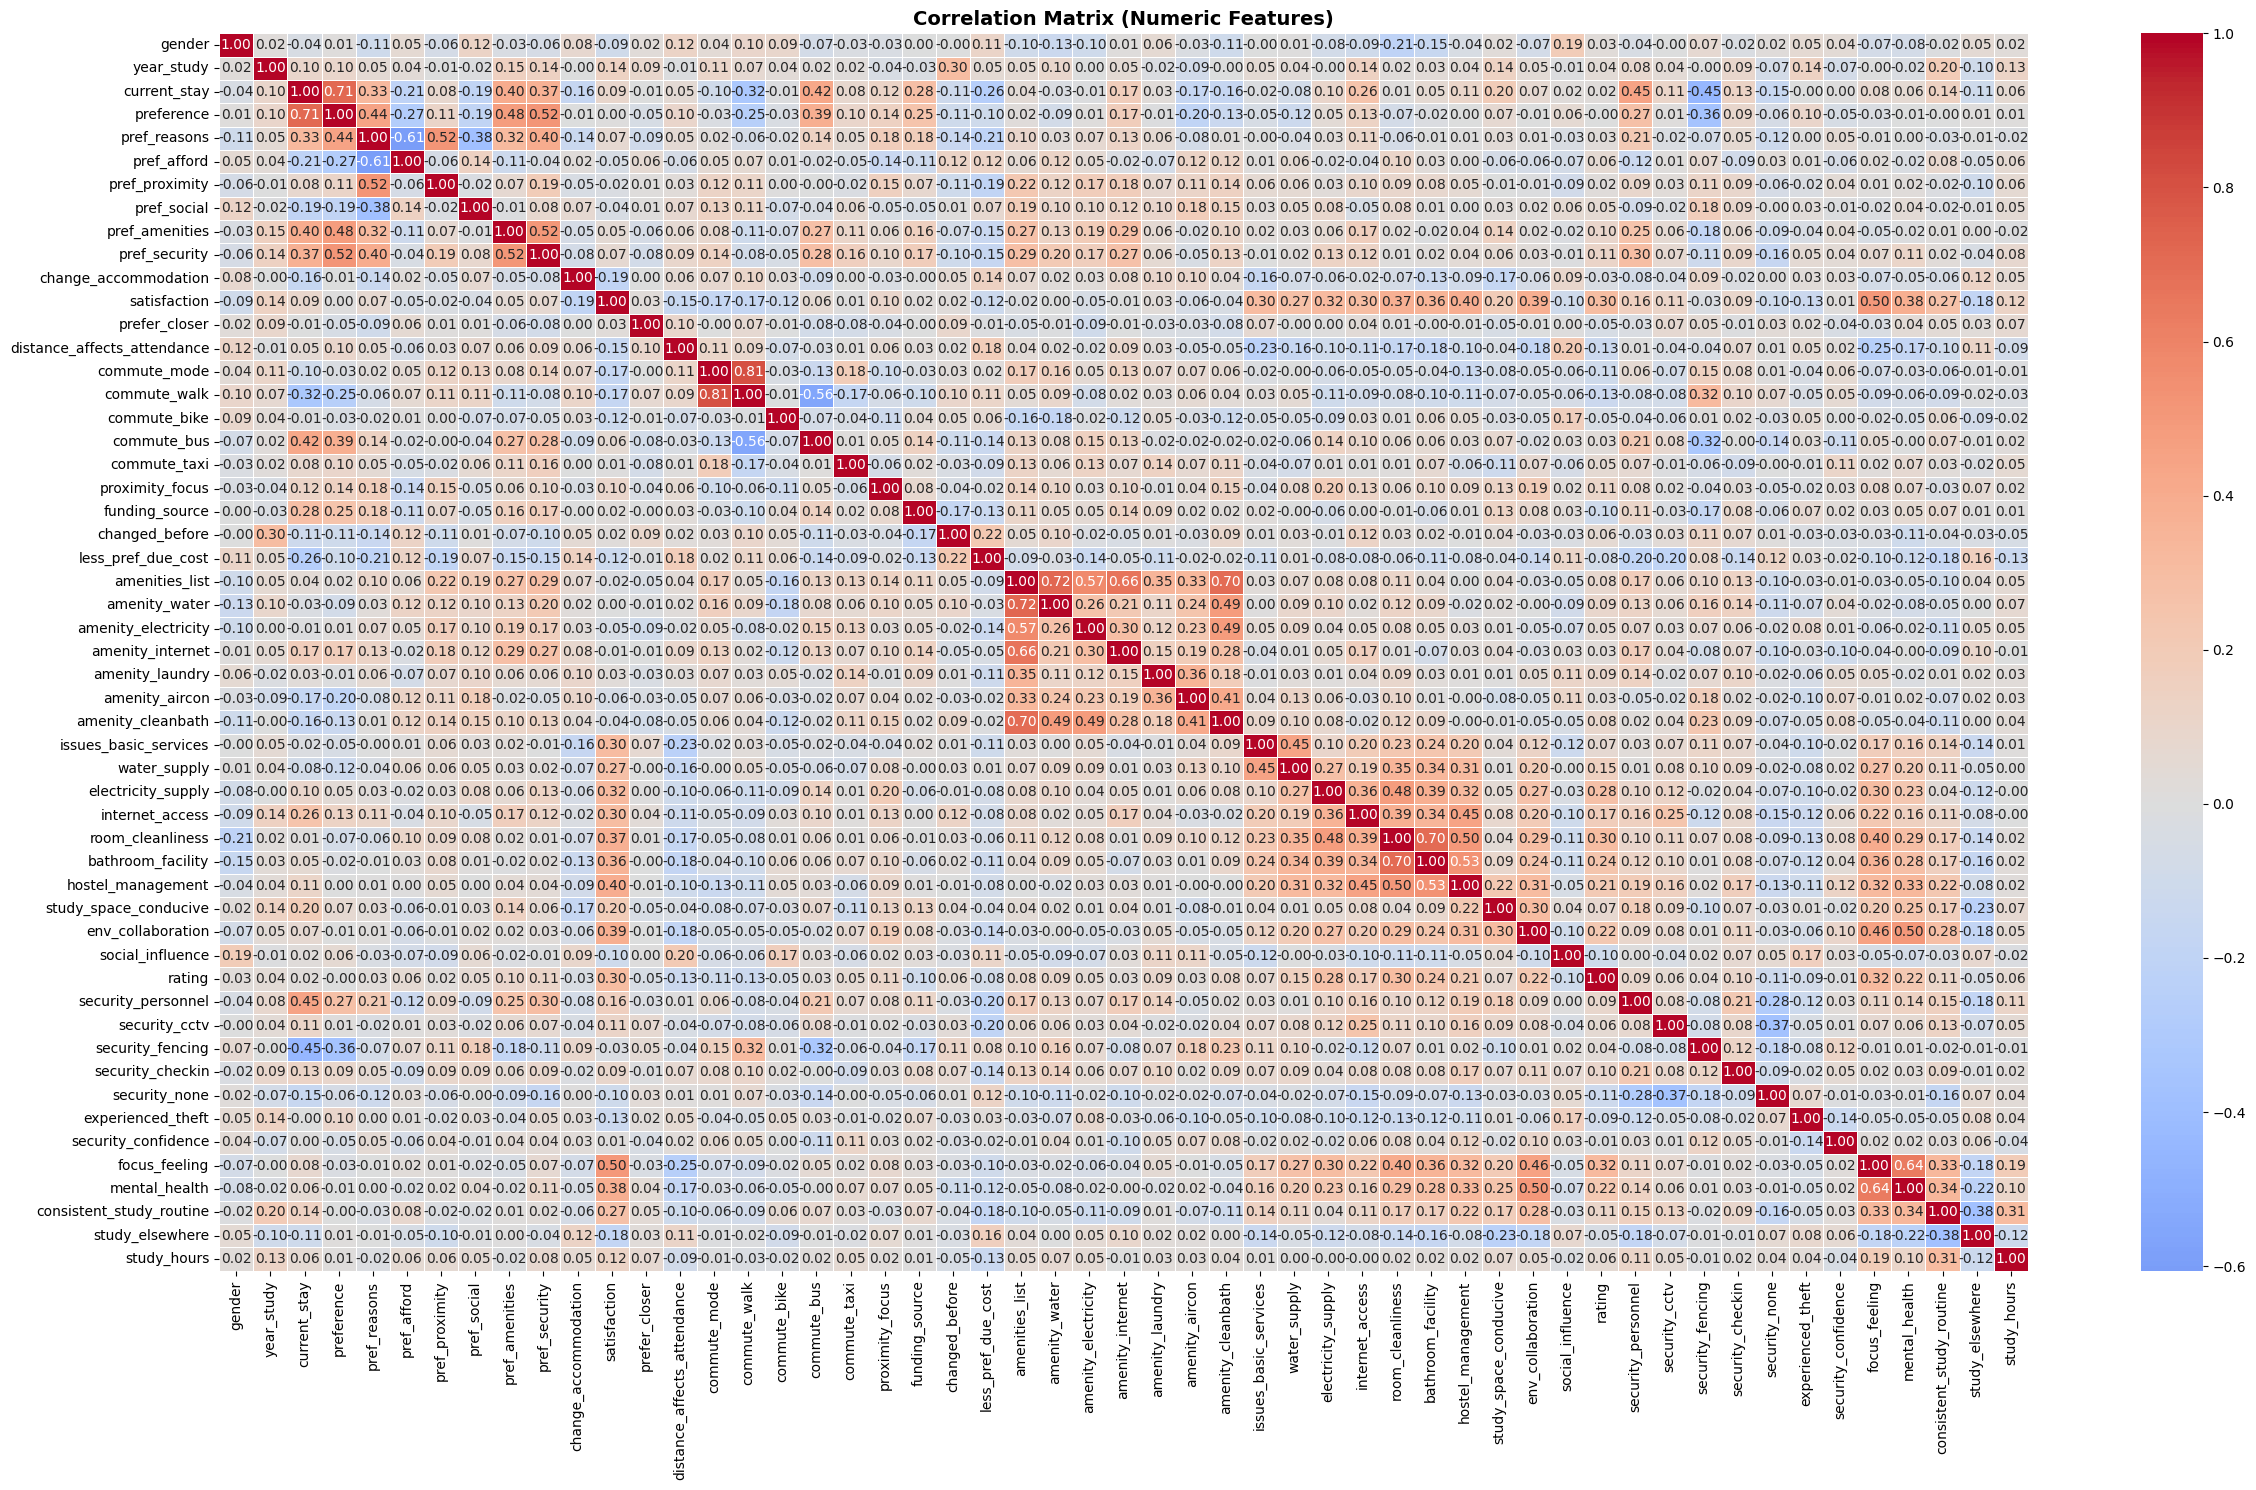

In [13]:
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr(method='pearson')  # or 'spearman'

# Plot
plt.figure(figsize=(25, 15))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix (Numeric Features)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Get correlations with current_stay
stay_corr = corr['current_stay'].drop('current_stay').sort_values(ascending=False)

# Separate into pull and push factors
pull_factors = stay_corr[stay_corr > 0].sort_values(ascending=False)
push_factors = stay_corr[stay_corr < 0].sort_values()  # smallest (most negative) first

# Convert to DataFrames for nice table display
pull_df = pd.DataFrame({
    'Feature': pull_factors.index,
    'Correlation': pull_factors.values
}).reset_index(drop=True)

push_df = pd.DataFrame({
    'Feature': push_factors.index,
    'Correlation': push_factors.values
}).reset_index(drop=True)

print("📌 Pull Factors (associated with staying ON-campus):")
display(pull_df)

print("\n📌 Push Factors (associated with staying OFF-campus):")
display(push_df)

📌 Pull Factors (associated with staying ON-campus):


,Feature,Correlation
0,preference,0.712995
1,security_personnel,0.452360
2,commute_bus,0.423142
3,pref_amenities,0.400753
4,pref_security,0.371503
5,pref_reasons,0.328019
6,funding_source,0.281584
7,internet_access,0.256347
8,study_space_conducive,0.196728
9,amenity_internet,0.174342



📌 Push Factors (associated with staying OFF-campus):


,Feature,Correlation
0,security_fencing,-0.448079
1,commute_walk,-0.321476
2,less_pref_due_cost,-0.257177
3,pref_afford,-0.206808
4,pref_social,-0.188427
5,amenity_aircon,-0.170790
6,change_accommodation,-0.159248
7,amenity_cleanbath,-0.159177
8,security_none,-0.149412
9,changed_before,-0.112834


,gender,Count,Percentage
0,Male,246,61.5
1,Female,154,38.5


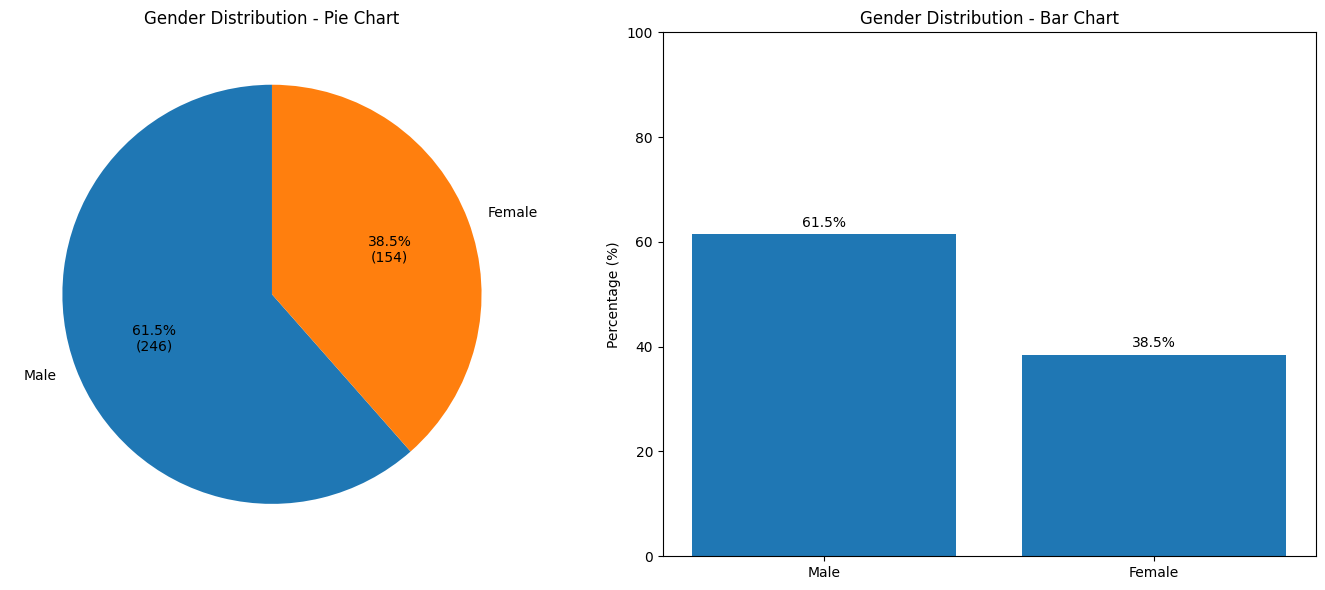

,year_study,Count,Percentage
0,4,138,34.50
1,2,99,24.75
2,3,97,24.25
3,1,59,14.75
4,5,6,1.50
5,6,1,0.25


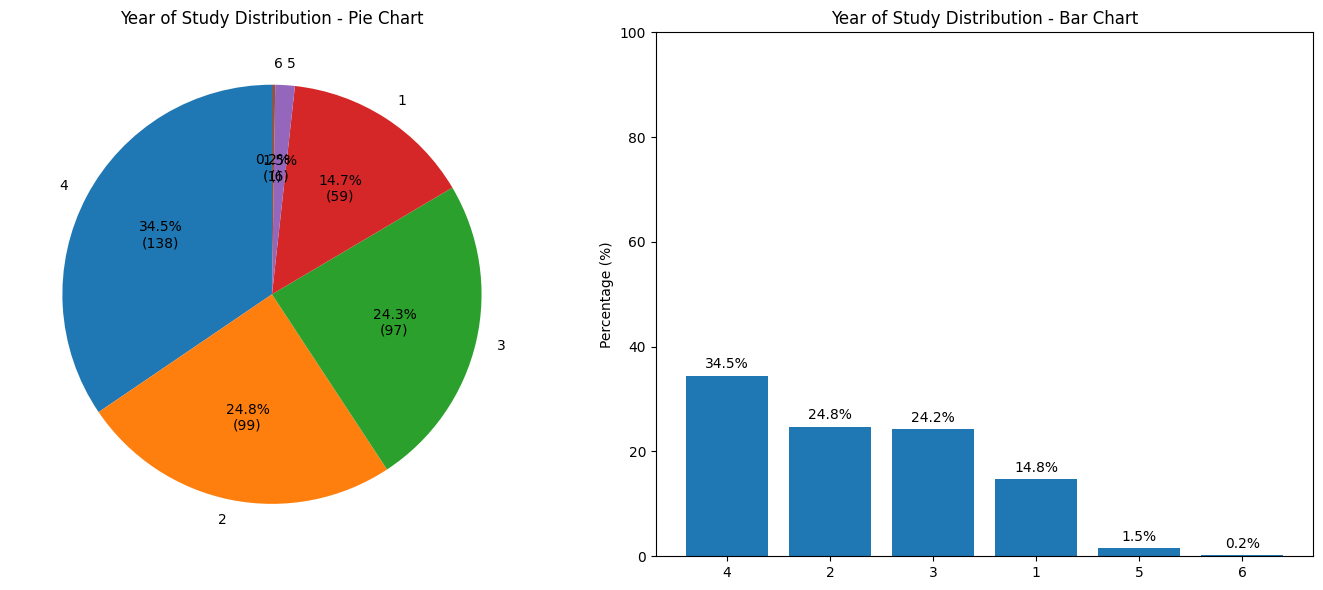

,current_stay,Count,Percentage
0,Off-Campus,220,55.0
1,On-Campus,180,45.0


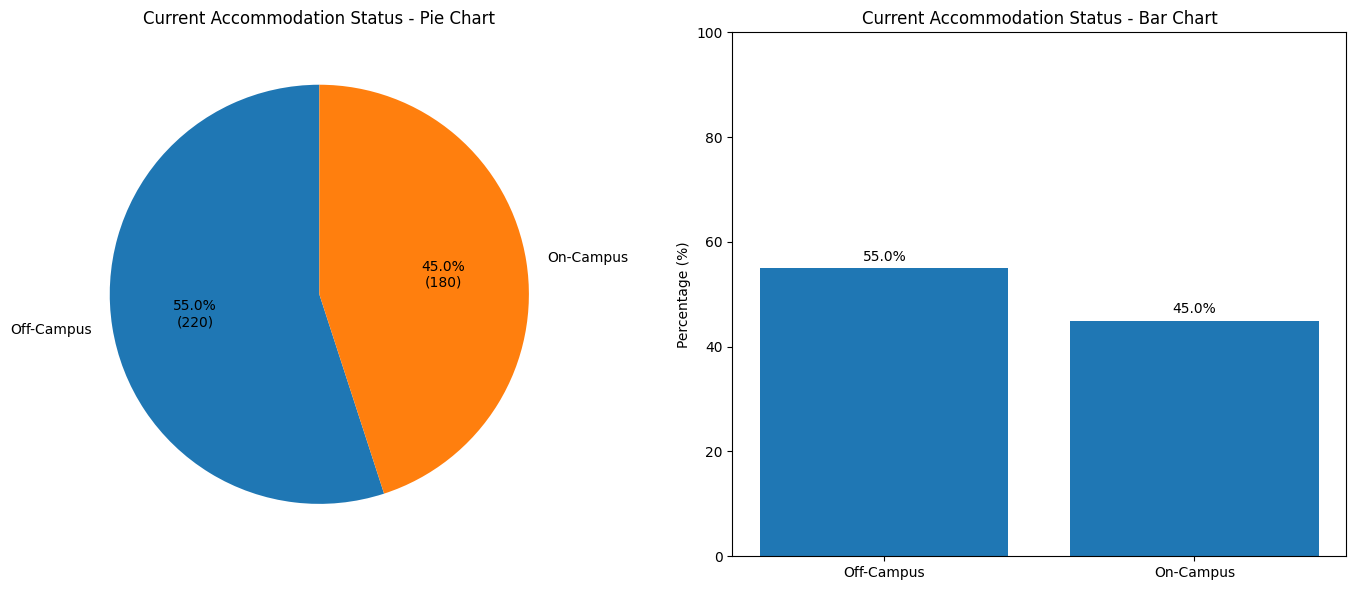

In [49]:
import matplotlib.pyplot as plt

def freq_table_and_charts(df, column, title):
    # Build frequency table
    freq = (
        df[column]
        .dropna()
        .value_counts()
        .rename_axis(column)
        .reset_index(name='Count')
    )
    total = int(freq['Count'].sum())
    freq['Percentage'] = (freq['Count'] / total * 100).round(2)
    display(freq)  # optional: comment this out if you don't want the table shown

    # Plot side-by-side pie and bar (percentages)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # ---- PIE: show % and count inside each slice ----
    wedges, texts, autotexts = axes[0].pie(
        freq['Percentage'],
        labels=freq[column].astype(str),
        autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct*total/100))})",
        startangle=90
    )
    axes[0].set_title(f"{title} - Pie Chart")

    # ---- BAR: plot percentages and label each bar ----
    bars = axes[1].bar(freq[column].astype(str), freq['Percentage'])
    axes[1].set_ylabel("Percentage (%)")
    axes[1].set_ylim(0, max(100, freq['Percentage'].max() + 10))
    axes[1].set_title(f"{title} - Bar Chart")

    # Add % label on every bar (robust across Matplotlib versions)
    for bar, pct in zip(bars, freq['Percentage']):
        h = bar.get_height()
        axes[1].annotate(
            f"{pct:.1f}%",
            xy=(bar.get_x() + bar.get_width() / 2, h),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center", va="bottom"
        )

    plt.tight_layout()
    plt.show()


# Gender
freq_table_and_charts(df, 'gender', 'Gender Distribution')

# Year of Study
freq_table_and_charts(df, 'year_study', 'Year of Study Distribution')

# Current Accommodation Status
freq_table_and_charts(df, 'current_stay', 'Current Accommodation Status')


In [51]:
# Calculate percentage for each commuting mode
commute_cols = ["commute_walk", "commute_bike", "commute_bus", "commute_taxi"]
percentages = df[commute_cols].mean() * 100

# Format into a nice DataFrame
commute_percentages = percentages.reset_index()
commute_percentages.columns = ["Commute_Mode", "Percentage"]
display(commute_percentages)

,Commute_Mode,Percentage
0,commute_walk,66.25
1,commute_bike,1.25
2,commute_bus,50.50
3,commute_taxi,10.00


Commute Mode Percentages by Gender:


,commute_walk,commute_bike,commute_bus,commute_taxi
gender,,,,
Female,60.389610,0.00000,55.194805,11.038961
Male,69.918699,2.03252,47.560976,9.349593


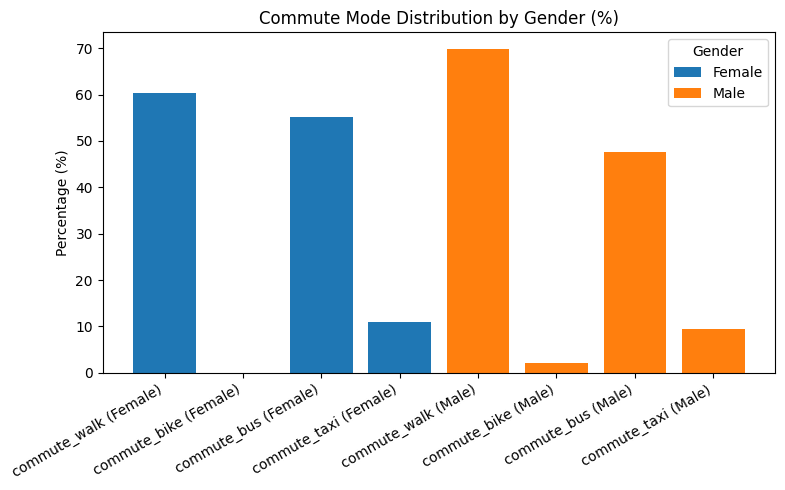

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Example commute columns
commute_cols = ["commute_walk", "commute_bike", "commute_bus", "commute_taxi"]

# Calculate percentages per gender
commute_percentages = df.groupby("gender")[commute_cols].mean() * 100

# Reshape for plotting
commute_percentages_melted = commute_percentages.reset_index().melt(
    id_vars="gender", 
    var_name="Commute_Mode", 
    value_name="Percentage"
)

# Show as table
print("Commute Mode Percentages by Gender:")
display(commute_percentages)

# Plot grouped bar chart
plt.figure(figsize=(8,5))
for gender in commute_percentages_melted["gender"].unique():
    subset = commute_percentages_melted[commute_percentages_melted["gender"] == gender]
    plt.bar(subset["Commute_Mode"] + " ("+gender+")", subset["Percentage"], label=gender)

plt.title("Commute Mode Distribution by Gender (%)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Commute Mode Percentages by Current Stay:


,commute_walk,commute_bike,commute_bus,commute_taxi
current_stay,,,,
Off-Campus,80.000000,1.363636,31.363636,7.727273
On-Campus,49.444444,1.111111,73.888889,12.777778


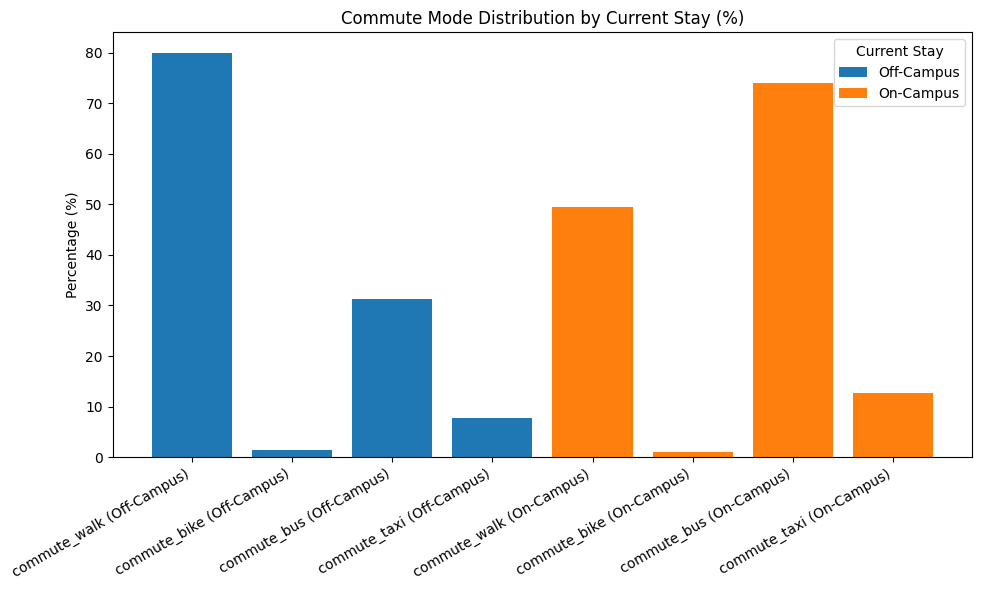

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Commute columns
commute_cols = ["commute_walk", "commute_bike", "commute_bus", "commute_taxi"]

# Calculate percentages per current_stay
commute_percentages = df.groupby("current_stay")[commute_cols].mean() * 100

# Reshape for plotting
commute_percentages_melted = commute_percentages.reset_index().melt(
    id_vars="current_stay", 
    var_name="Commute_Mode", 
    value_name="Percentage"
)

# Show as table
print("Commute Mode Percentages by Current Stay:")
display(commute_percentages)

# Plot grouped bar chart
plt.figure(figsize=(10,6))
for stay in commute_percentages_melted["current_stay"].unique():
    subset = commute_percentages_melted[commute_percentages_melted["current_stay"] == stay]
    plt.bar(subset["Commute_Mode"] + " ("+stay+")", subset["Percentage"], label=stay)

plt.title("Commute Mode Distribution by Current Stay (%)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Current Stay")
plt.tight_layout()
plt.show()


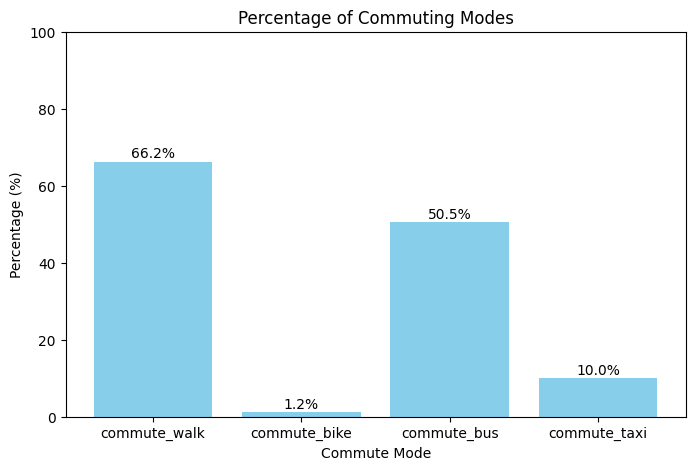

In [36]:
# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(commute_percentages["Commute_Mode"], commute_percentages["Percentage"], color="skyblue")
plt.title("Percentage of Commuting Modes")
plt.xlabel("Commute Mode")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Show values on top of bars
for idx, val in enumerate(commute_percentages["Percentage"]):
    plt.text(idx, val + 1, f"{val:.1f}%", ha='center')

plt.show()

In [67]:
df['changed_before'].value_counts()

changed_before
No     240
Yes    160
Name: count, dtype: int64

🔒 Overall Security Availability


,Security_Feature,Percentage
0,security_personnel,57.50
1,security_cctv,64.25
2,security_fencing,36.00
3,security_checkin,14.50
4,security_none,7.75


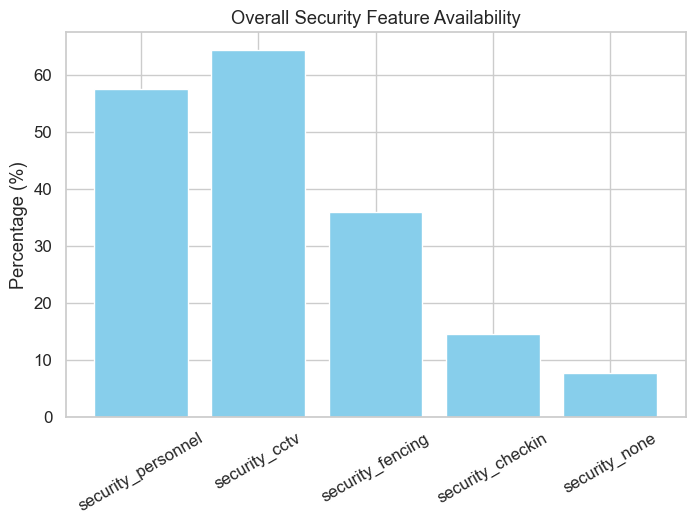

🔒 Security Features by Gender


,gender,security_personnel,security_cctv,security_fencing,security_checkin,security_none
0,Female,59.74,64.29,31.82,15.58,7.14
1,Male,56.10,64.23,38.62,13.82,8.13


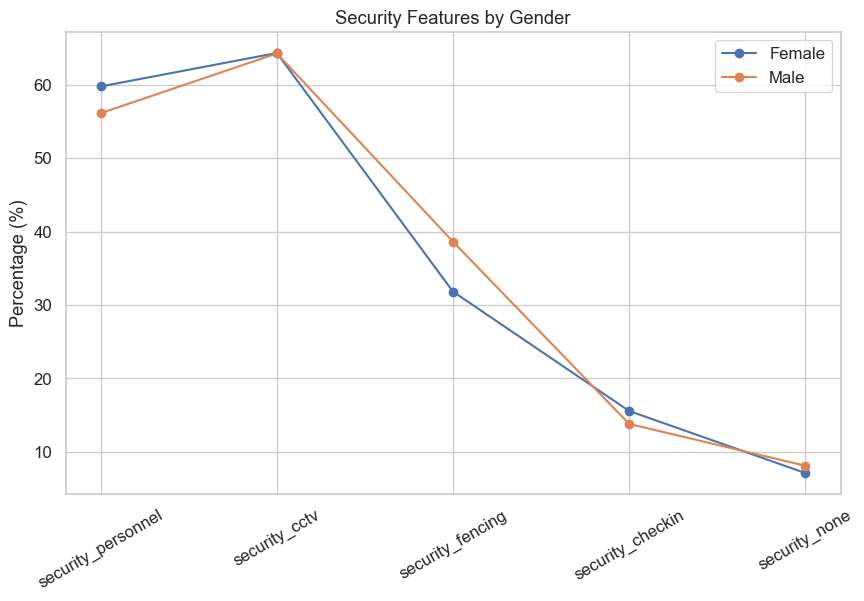

🔒 Security Features by Current Stay


,current_stay,security_personnel,security_cctv,security_fencing,security_checkin,security_none
0,Off-Campus,37.27,59.55,55.45,10.45,11.36
1,On-Campus,82.22,70.00,12.22,19.44,3.33


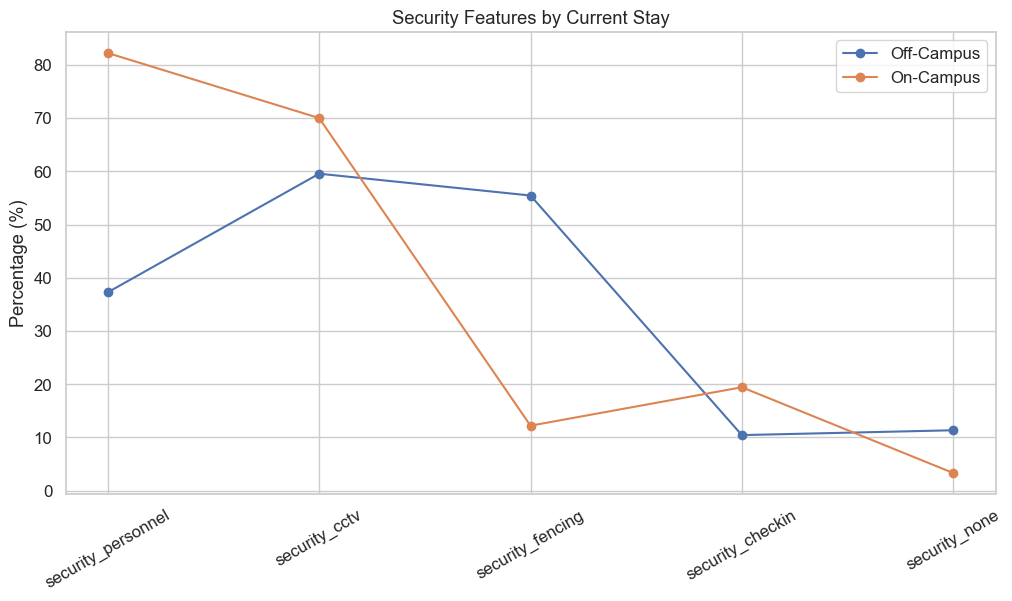

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Security columns
security_cols = ["security_personnel", "security_cctv", "security_fencing", 
                 "security_checkin", "security_none"]

### 1. Overall percentages
overall_security = df[security_cols].mean() * 100
overall_df = overall_security.reset_index()
overall_df.columns = ["Security_Feature", "Percentage"]

print("🔒 Overall Security Availability")
display(overall_df)

# Plot overall
plt.figure(figsize=(8,5))
plt.bar(overall_df["Security_Feature"], overall_df["Percentage"], color="skyblue")
plt.title("Overall Security Feature Availability")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)
plt.show()


### 2. Grouped by gender
gender_security = (df.groupby("gender")[security_cols].mean() * 100).round(2)
gender_security = gender_security.reset_index()

print("🔒 Security Features by Gender")
display(gender_security)

# Plot gender
gender_security_melt = gender_security.melt(id_vars="gender", 
                                            var_name="Security_Feature", 
                                            value_name="Percentage")

plt.figure(figsize=(10,6))
for gender in gender_security["gender"].unique():
    subset = gender_security_melt[gender_security_melt["gender"] == gender]
    plt.plot(subset["Security_Feature"], subset["Percentage"], marker="o", label=gender)

plt.title("Security Features by Gender")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)
plt.legend()
plt.show()


### 3. Grouped by current_stay
stay_security = (df.groupby("current_stay")[security_cols].mean() * 100).round(2)
stay_security = stay_security.reset_index()

print("🔒 Security Features by Current Stay")
display(stay_security)

# Plot current_stay
stay_security_melt = stay_security.melt(id_vars="current_stay", 
                                        var_name="Security_Feature", 
                                        value_name="Percentage")

plt.figure(figsize=(12,6))
for stay in stay_security["current_stay"].unique():
    subset = stay_security_melt[stay_security_melt["current_stay"] == stay]
    plt.plot(subset["Security_Feature"], subset["Percentage"], marker="o", label=stay)

plt.title("Security Features by Current Stay")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Overall Affordability Preference


,Affordability,Percentage
0,0,62.25
1,1,37.75


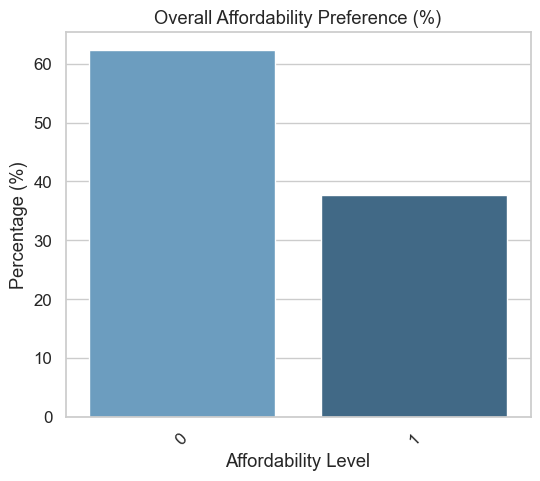

Affordability Preference by Gender


,gender,pref_afford,Percentage
0,Female,0,65.584416
1,Female,1,34.415584
2,Male,0,60.162602
3,Male,1,39.837398


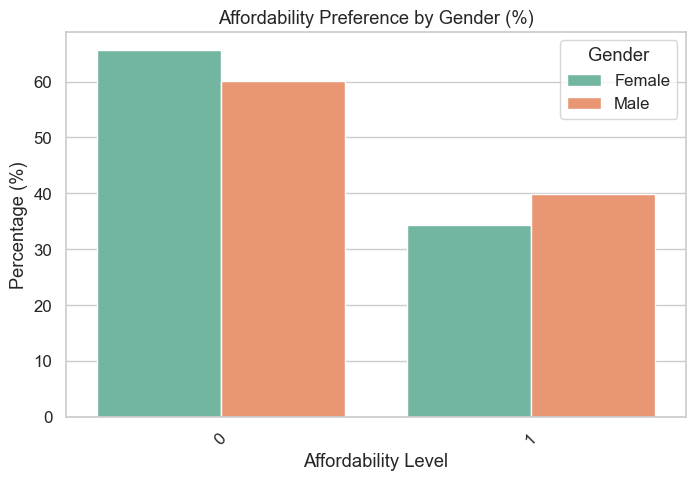

Affordability Preference by Current Stay


,current_stay,pref_afford,Percentage
0,Off-Campus,0,53.181818
1,Off-Campus,1,46.818182
2,On-Campus,0,73.333333
3,On-Campus,1,26.666667


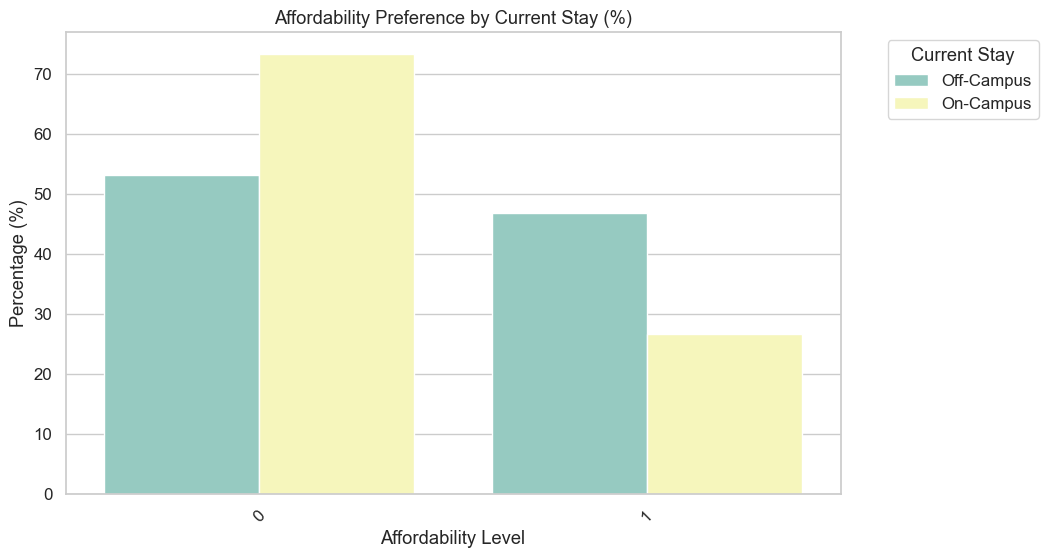

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# ------------------------
# 1. Overall Distribution
# ------------------------
overall_afford = df['pref_afford'].value_counts(normalize=True) * 100
overall_df = overall_afford.reset_index()
overall_df.columns = ["Affordability", "Percentage"]

print("Overall Affordability Preference")
display(overall_df)

plt.figure(figsize=(6,5))
sns.barplot(data=overall_df, x="Affordability", y="Percentage", palette="Blues_d")
plt.title("Overall Affordability Preference (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Affordability Level")
plt.xticks(rotation=45)
plt.show()


# ------------------------
# 2. Grouped by Gender
# ------------------------
gender_afford = df.groupby("gender")["pref_afford"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

print("Affordability Preference by Gender")
display(gender_afford)

plt.figure(figsize=(8,5))
sns.barplot(data=gender_afford, x="pref_afford", y="Percentage", hue="gender", palette="Set2")
plt.title("Affordability Preference by Gender (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Affordability Level")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


# ------------------------
# 3. Grouped by Current Stay
# ------------------------
stay_afford = df.groupby("current_stay")["pref_afford"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

print("Affordability Preference by Current Stay")
display(stay_afford)

plt.figure(figsize=(10,6))
sns.barplot(data=stay_afford, x="pref_afford", y="Percentage", hue="current_stay", palette="Set3")
plt.title("Affordability Preference by Current Stay (%)")
plt.ylabel("Percentage (%)")
plt.xlabel("Affordability Level")
plt.xticks(rotation=45)
plt.legend(title="Current Stay", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Overall: 35.25% of students less preferred due to cost.


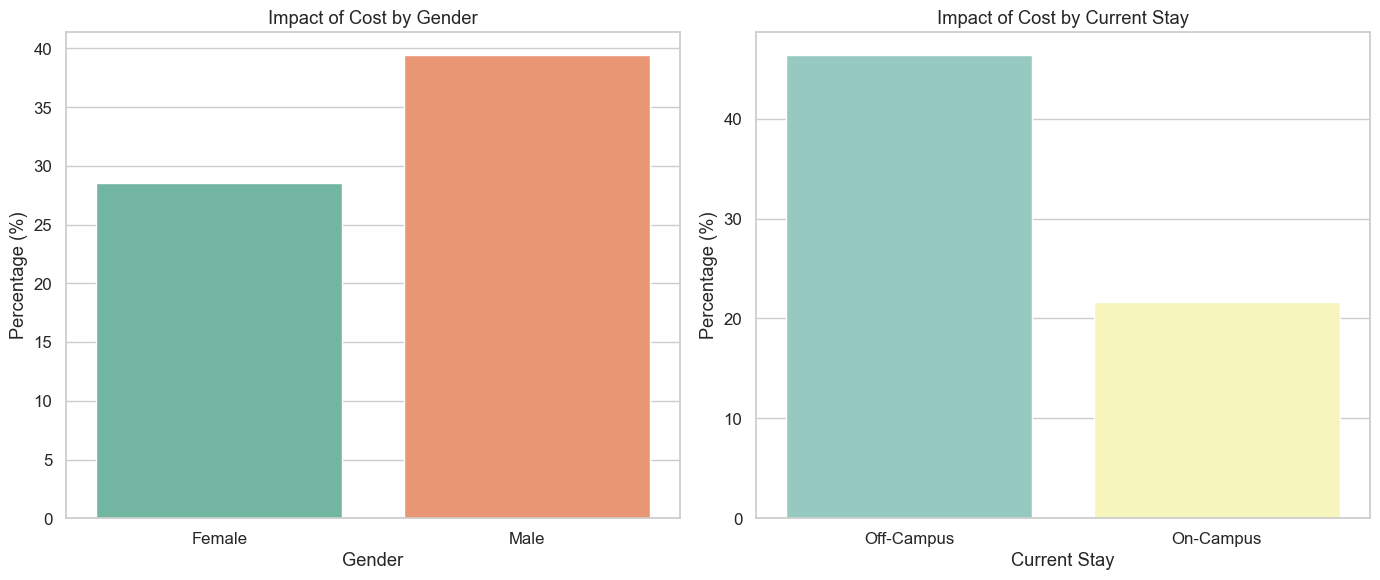


=== Cost Impact by Gender ===


,gender,Percentage
0,Female,28.571429
1,Male,39.430894



=== Cost Impact by Current Stay ===


,current_stay,Percentage
0,Off-Campus,46.363636
1,On-Campus,21.666667


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Overall percentage ===
df["less_pref_due_cost"] = df_encoded['less_pref_due_cost']
overall_cost = df["less_pref_due_cost"].mean() * 100
print(f"Overall: {overall_cost:.2f}% of students less preferred due to cost.")

# === 2. Group by gender ===
gender_cost = df.groupby("gender")["less_pref_due_cost"].mean().reset_index()
gender_cost["Percentage"] = gender_cost["less_pref_due_cost"] * 100
gender_cost = gender_cost[["gender", "Percentage"]]

# === 3. Group by current stay ===
stay_cost = df.groupby("current_stay")["less_pref_due_cost"].mean().reset_index()
stay_cost["Percentage"] = stay_cost["less_pref_due_cost"] * 100
stay_cost = stay_cost[["current_stay", "Percentage"]]

# === 4. Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot by gender
sns.barplot(data=gender_cost, x="gender", y="Percentage", ax=axes[0], palette="Set2")
axes[0].set_title("Impact of Cost by Gender")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("Gender")

# Plot by current stay
sns.barplot(data=stay_cost, x="current_stay", y="Percentage", ax=axes[1], palette="Set3")
axes[1].set_title("Impact of Cost by Current Stay")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xlabel("Current Stay")

plt.tight_layout()
plt.show()

# Display tables
print("\n=== Cost Impact by Gender ===")
display(gender_cost)

print("\n=== Cost Impact by Current Stay ===")
display(stay_cost)

In [52]:
df.columns

Index(['gender', 'year_study', 'current_stay', 'preference', 'pref_reasons',
       'pref_afford', 'pref_proximity', 'pref_social', 'pref_amenities',
       'pref_security', 'change_accommodation', 'satisfaction',
       'prefer_closer', 'distance_affects_attendance', 'commute_mode',
       'commute_walk', 'commute_bike', 'commute_bus', 'commute_taxi',
       'proximity_focus', 'funding_source', 'changed_before',
       'less_pref_due_cost', 'amenities_list', 'amenity_water',
       'amenity_electricity', 'amenity_internet', 'amenity_laundry',
       'amenity_aircon', 'amenity_cleanbath', 'issues_basic_services',
       'water_supply', 'electricity_supply', 'internet_access',
       'room_cleanliness', 'bathroom_facility', 'hostel_management',
       'study_space_conducive', 'env_collaboration', 'social_influence',
       'rating', 'security_personnel', 'security_cctv', 'security_fencing',
       'security_checkin', 'security_none', 'experienced_theft',
       'security_confidence', 'f

,Preference,Count,Percentage
0,On-campus hostel,221,55.25
1,Off-campus hostel,179,44.75


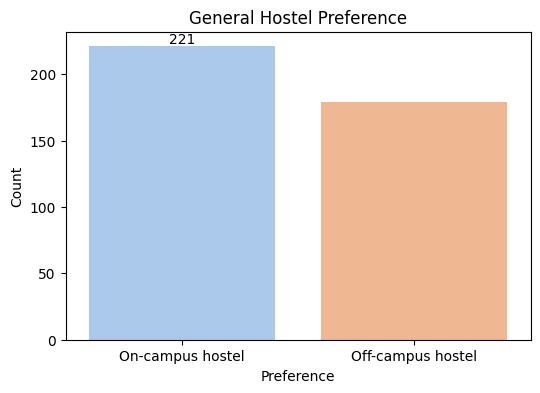

,Pull Factor,Percentage
0,pref_proximity,58.50
1,pref_amenities,51.75
2,pref_security,43.00
3,pref_afford,37.75
4,pref_social,29.50


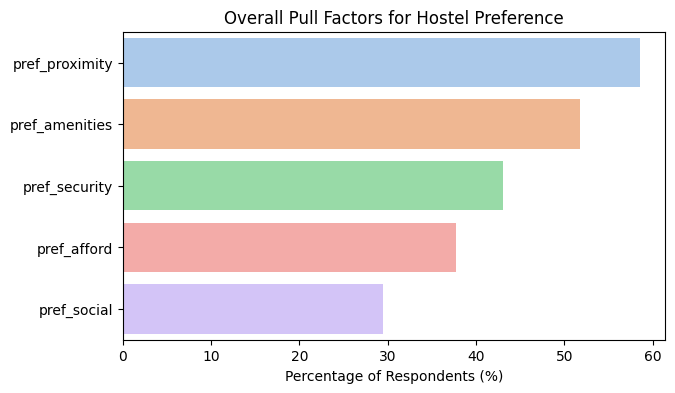

,Pull Factor,Current Stay,Percentage
0,pref_proximity,Off-Campus,55.000000
1,pref_amenities,Off-Campus,33.636364
2,pref_security,Off-Campus,26.363636
3,pref_afford,Off-Campus,46.818182
4,pref_social,Off-Campus,37.272727
5,pref_proximity,On-Campus,62.777778
6,pref_amenities,On-Campus,73.888889
7,pref_security,On-Campus,63.333333
8,pref_afford,On-Campus,26.666667
9,pref_social,On-Campus,20.000000


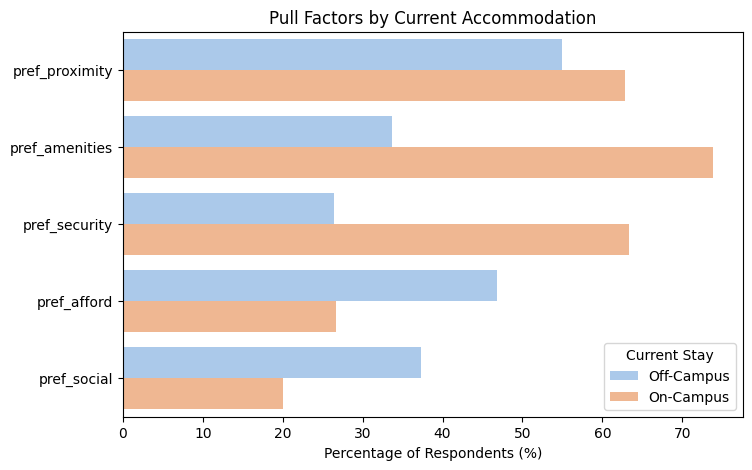

In [16]:
# 1️⃣ General Hostel Preference
pref_table = df['preference'].value_counts().reset_index()
pref_table.columns = ['Preference', 'Count']
pref_table['Percentage'] = (pref_table['Count'] / len(df) * 100).round(2)
display(pref_table)

plt.figure(figsize=(6, 4))
sns.barplot(data=pref_table, x='Preference', y='Count', palette='pastel')
plt.title('General Hostel Preference')
plt.bar_label(plt.gca().containers[0])
plt.show()

# 2️⃣ Pull factors selection rates (overall)
pull_cols = ['pref_proximity', 'pref_amenities', 'pref_security', 'pref_afford', 'pref_social']
pull_df = df[pull_cols].mean().sort_values(ascending=False) * 100  # percentage selecting each factor
pull_df = pull_df.reset_index()
pull_df.columns = ['Pull Factor', 'Percentage']
display(pull_df)

plt.figure(figsize=(7, 4))
sns.barplot(data=pull_df, x='Percentage', y='Pull Factor', palette='pastel')
plt.title('Overall Pull Factors for Hostel Preference')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('')
plt.show()

# 3️⃣ Pull factors comparison between on-campus and off-campus
pull_comp = df.groupby('current_stay')[pull_cols].mean().T * 100
pull_comp.columns.name = None  # cleaner column name
pull_comp = pull_comp.reset_index().melt(id_vars='index', var_name='Current Stay', value_name='Percentage')
pull_comp.rename(columns={'index': 'Pull Factor'}, inplace=True)
display(pull_comp)

plt.figure(figsize=(8, 5))
sns.barplot(data=pull_comp, x='Percentage', y='Pull Factor', hue='Current Stay', palette='pastel')
plt.title('Pull Factors by Current Accommodation')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('')
plt.legend(title='Current Stay')
plt.show()

,Amenity,Availability (%)
0,amenity_water,89.25
1,amenity_electricity,86.50
2,amenity_cleanbath,69.75
3,amenity_internet,68.25
4,amenity_laundry,8.50


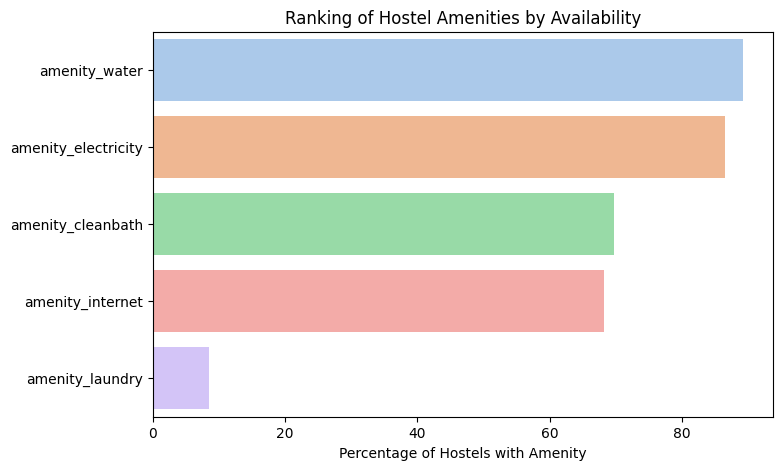

,Amenity,Current Stay,Availability (%)
0,amenity_internet,Off-Campus,60.909091
1,amenity_water,Off-Campus,90.000000
2,amenity_cleanbath,Off-Campus,76.363636
3,amenity_electricity,Off-Campus,86.818182
4,amenity_laundry,Off-Campus,7.727273
5,amenity_internet,On-Campus,77.222222
6,amenity_water,On-Campus,88.333333
7,amenity_cleanbath,On-Campus,61.666667
8,amenity_electricity,On-Campus,86.111111
9,amenity_laundry,On-Campus,9.444444


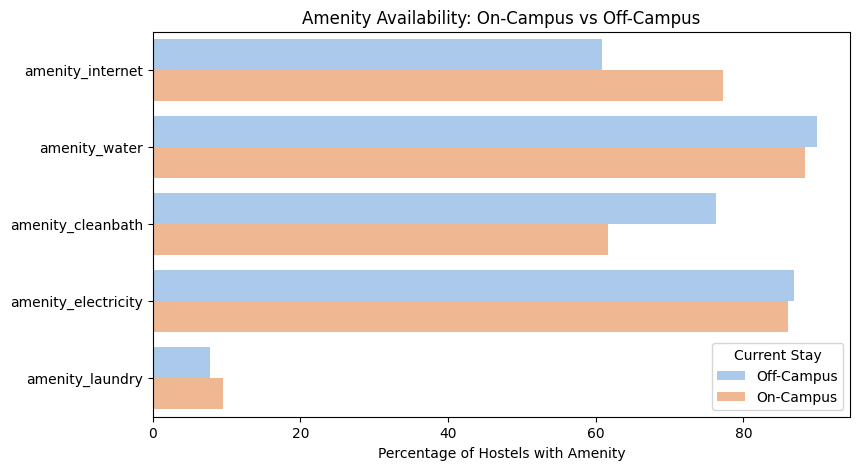

Availability of Amenities by Gender (%)


,amenity_internet,amenity_water,amenity_cleanbath,amenity_electricity,amenity_laundry
gender,,,,,
Female,67.53,94.16,75.97,90.91,6.49
Male,68.70,86.18,65.85,83.74,9.76


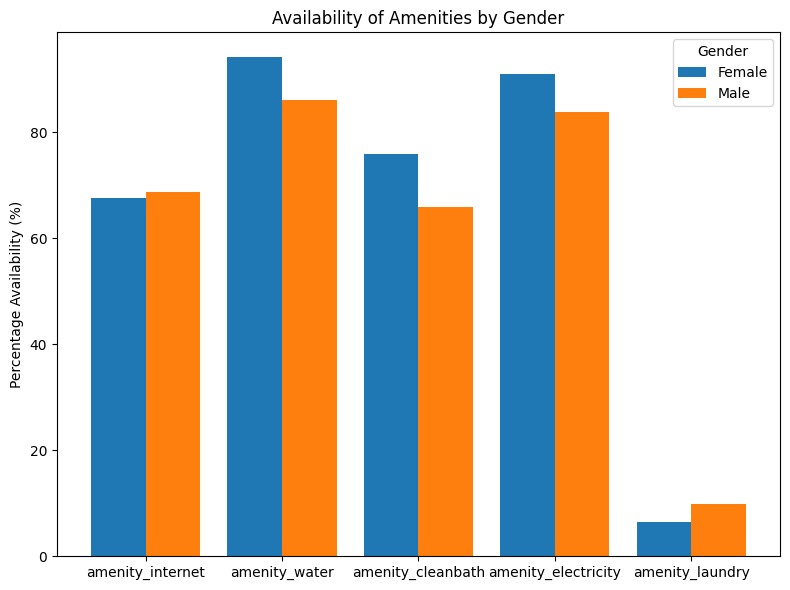

In [72]:
# 1️⃣ Ranking availability of amenities
amenity_cols = ['amenity_internet', 'amenity_water','amenity_cleanbath','amenity_electricity','amenity_laundry']

# Calculate % availability across respondents
amenity_avail = df[amenity_cols].mean().sort_values(ascending=False) * 100
amenity_avail = amenity_avail.reset_index()
amenity_avail.columns = ['Amenity', 'Availability (%)']
display(amenity_avail)

# Plot ranking of amenities
plt.figure(figsize=(8, 5))
sns.barplot(data=amenity_avail, x='Availability (%)', y='Amenity', palette='pastel')
plt.title('Ranking of Hostel Amenities by Availability')
plt.xlabel('Percentage of Hostels with Amenity')
plt.ylabel('')
plt.show()

# 2️⃣ Compare availability between on-campus and off-campus hostels
amenity_comp = df.groupby('current_stay')[amenity_cols].mean().T * 100
amenity_comp.columns.name = None
amenity_comp = amenity_comp.reset_index().melt(id_vars='index', var_name='Current Stay', value_name='Availability (%)')
amenity_comp.rename(columns={'index': 'Amenity'}, inplace=True)
display(amenity_comp)

# Plot comparison
plt.figure(figsize=(9, 5))
sns.barplot(data=amenity_comp, x='Availability (%)', y='Amenity', hue='Current Stay', palette='pastel')
plt.title('Amenity Availability: On-Campus vs Off-Campus')
plt.xlabel('Percentage of Hostels with Amenity')
plt.ylabel('')
plt.legend(title='Current Stay')
plt.show()

availability_by_gender = df.groupby("gender")[amenity_cols].mean() * 100
availability_by_gender = availability_by_gender.round(2)

print("Availability of Amenities by Gender (%)")
display(availability_by_gender)

# --- 2. Plot grouped bar chart ---
availability_by_gender.T.plot(
    kind="bar",
    figsize=(8,6),
    width=0.8
)

plt.title("Availability of Amenities by Gender")
plt.ylabel("Percentage Availability (%)")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Likert variables detected: ['satisfaction', 'proximity_focus', 'water_supply', 'electricity_supply', 'internet_access', 'room_cleanliness', 'bathroom_facility', 'hostel_management', 'env_collaboration', 'rating', 'focus_feeling', 'mental_health']


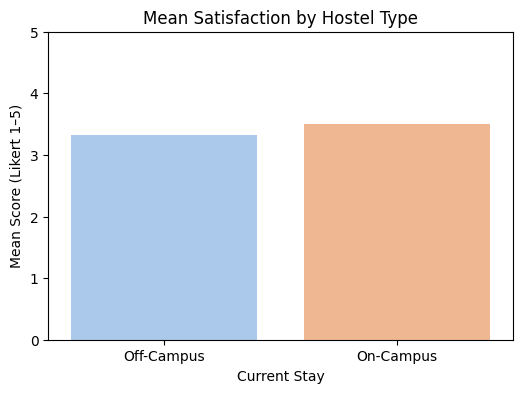

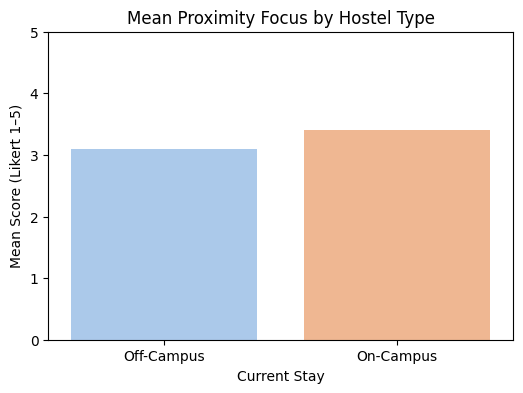

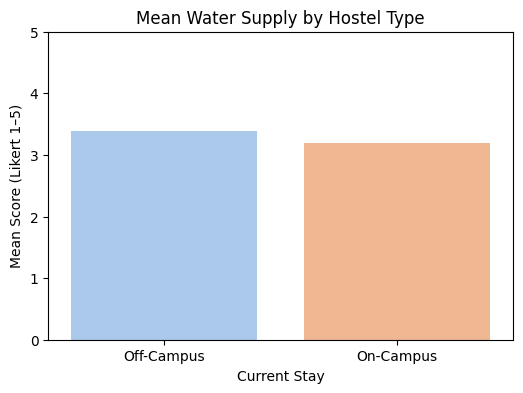

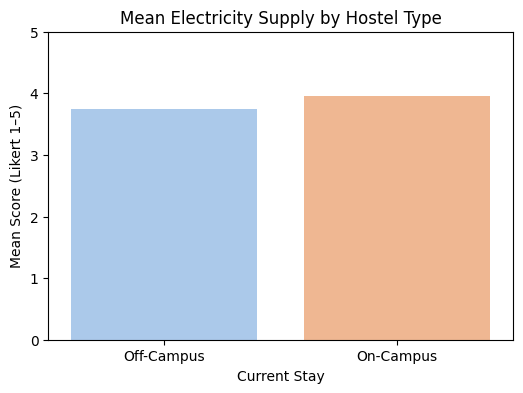

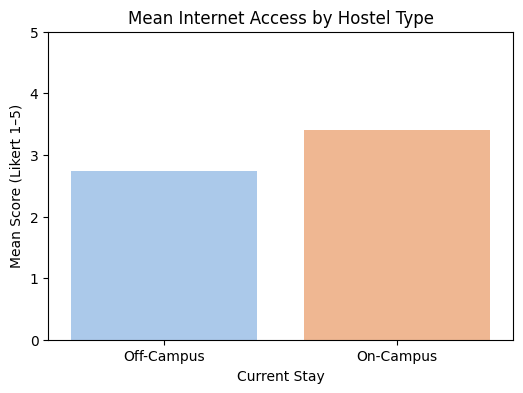

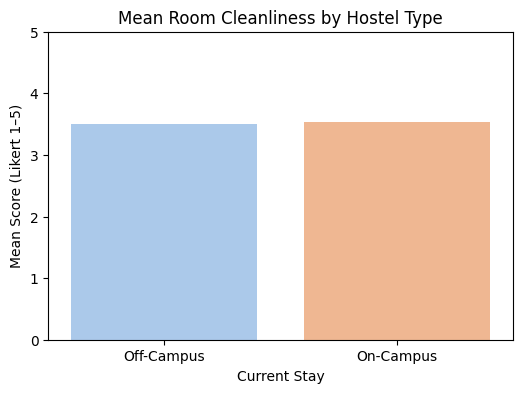

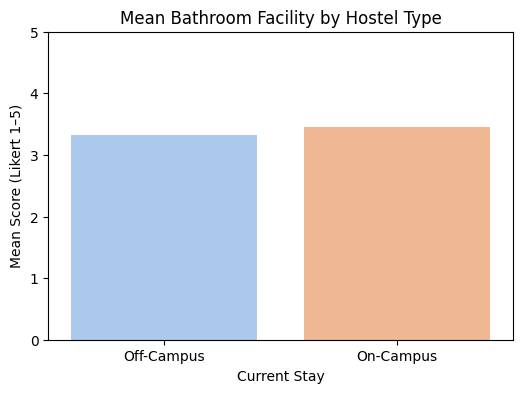

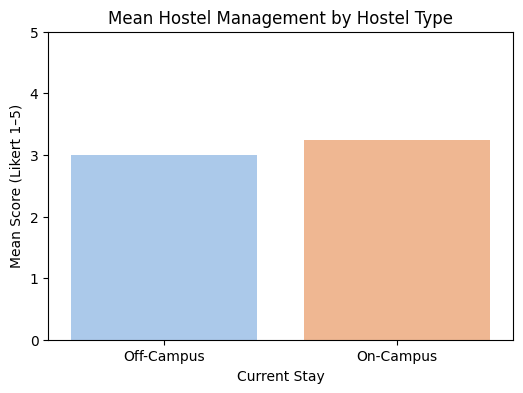

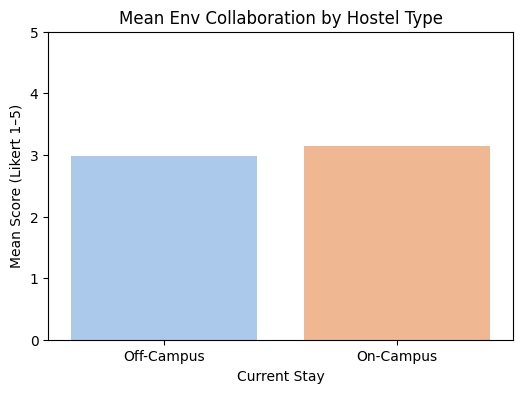

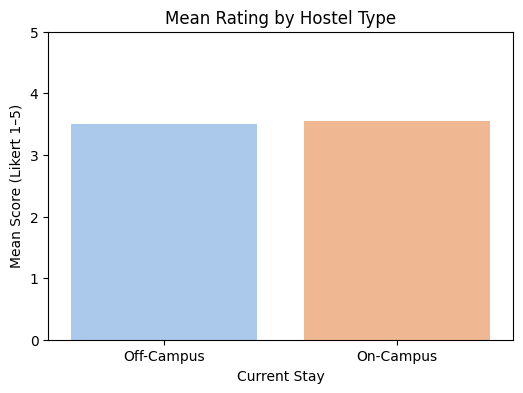

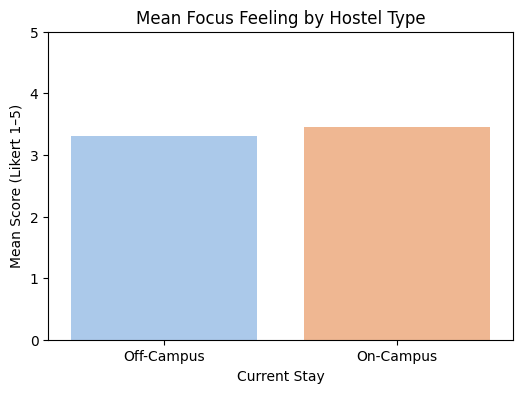

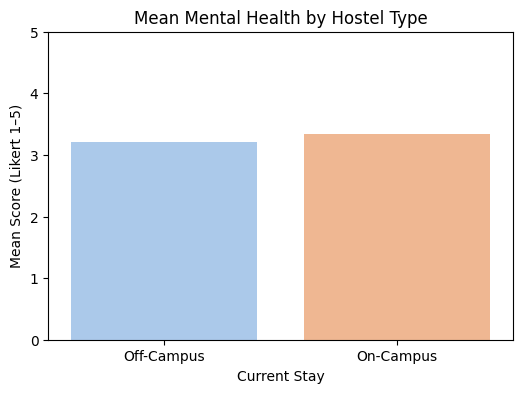

TypeError: agg function failed [how->mean,dtype->object]

In [33]:
# Identify Likert scale columns (numeric, range 1–5)
categorical_vars = df.select_dtypes(exclude='number')
numeric_vars = df.select_dtypes(exclude='number')

likert_vars = [
    col for col in df.columns
    if df[col].dtype in ['int64', 'float64']
    and df[col].min() >= 1
    and df[col].max() <= 5
]

print("Likert variables detected:", likert_vars)

# Plot each Likert variable's mean by current_stay
for var in likert_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(
        data=df,
        x='current_stay',
        y=var,
        palette='pastel',
        ci=None
    )
    plt.title(f'Mean {var.replace("_", " ").title()} by Hostel Type')
    plt.ylabel('Mean Score (Likert 1–5)')
    plt.xlabel('Current Stay')
    plt.ylim(0,5)
    plt.show()


# 2️⃣ Categorical Yes/No variables: percentage comparison
for var in categorical_vars:
    cat_summary = df.groupby('current_stay')[var].mean().reset_index()
    cat_summary[var] = cat_summary[var] * 100

    plt.figure(figsize=(6,4))
    sns.barplot(
        data=cat_summary,
        x='current_stay',
        y=var,
        palette='pastel'
    )
    plt.title(f'% Yes - {var.replace("_", " ").title()}')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Current Stay')
    plt.ylim(0,100)
    plt.show()

# 3️⃣ Study hours: mean comparison
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='current_stay',
    y='study_hours',
    palette='pastel',
    ci=None
)
plt.title('Mean Study Hours per Day by Hostel Type')
plt.ylabel('Hours')
plt.xlabel('Current Stay')
plt.show()

# 4️⃣ Optional: Combined table for reporting
summary_stats = df.groupby('current_stay')[likert_vars + categorical_vars + numeric_vars].mean().round(2)
display(summary_stats)

pref_proximity    234
pref_amenities    207
pref_security     172
pref_afford       151
pref_social       118
dtype: int64

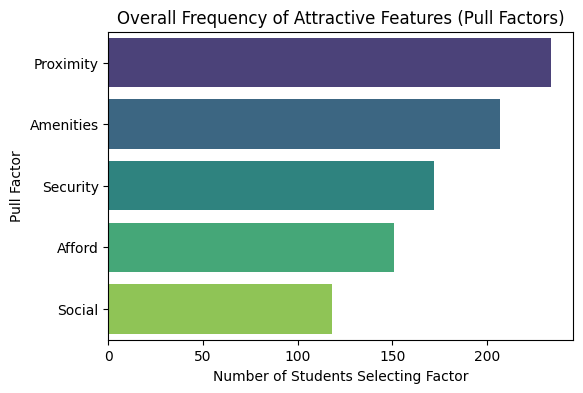

preference,Off-campus hostel,On-campus hostel
Proximity,52.513966,63.348416
Amenities,25.139665,73.303167
Security,14.525140,66.063348
Afford,52.513966,25.791855
Social,39.106145,21.719457


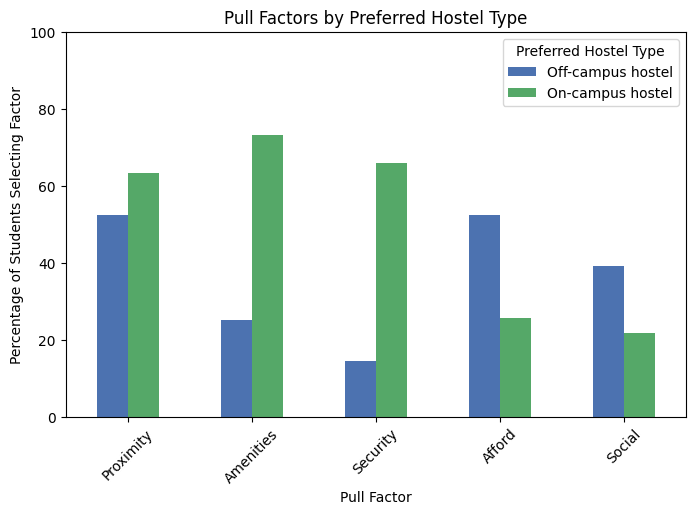

In [19]:
# Pull factor columns
pull_factor_cols = [
    'pref_proximity', 'pref_amenities', 'pref_security',
    'pref_afford', 'pref_social'
]

# 1. Overall frequency of pull factors
pull_counts = df[pull_factor_cols].sum().sort_values(ascending=False)
display(pull_counts)
plt.figure(figsize=(6,4))
sns.barplot(
    x=pull_counts.values,
    y=pull_counts.index.str.replace('pref_', '').str.title(),
    palette='viridis'
)
plt.title("Overall Frequency of Attractive Features (Pull Factors)")
plt.xlabel("Number of Students Selecting Factor")
plt.ylabel("Pull Factor")
plt.show()

# 2. Split by preferred hostel type
pull_by_pref = df.groupby('preference')[pull_factor_cols].mean().T

# Convert proportions to percentages
pull_by_pref = pull_by_pref * 100
pull_by_pref.index = pull_by_pref.index.str.replace('pref_', '').str.title()
display(pull_by_pref)

# Plot grouped bar chart
pull_by_pref.plot(
    kind='bar',
    figsize=(8,5),
    color=['#4C72B0', '#55A868']
)
plt.title("Pull Factors by Preferred Hostel Type")
plt.ylabel("Percentage of Students Selecting Factor")
plt.xlabel("Pull Factor")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title="Preferred Hostel Type")
plt.show()

pref_proximity    61
pref_amenities    51
pref_afford       46
pref_security     39
dtype: int64

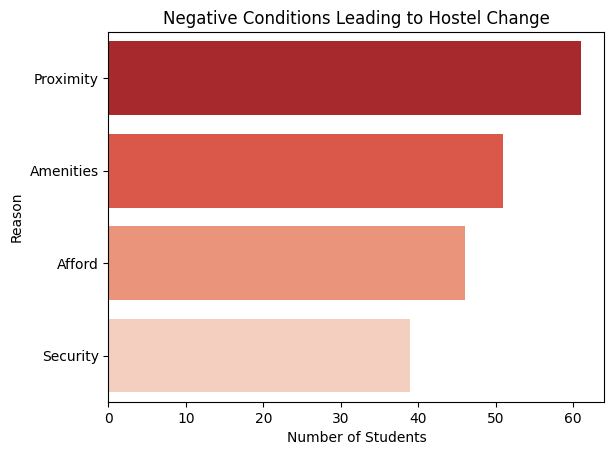

15.25


In [26]:
change_cols = ['pref_afford', 'pref_proximity', 'pref_amenities', 'pref_security']
change_reason_counts = df[df['change_accommodation'] == 'Yes'][change_cols].sum().sort_values(ascending=False)
display(change_reason_counts)

sns.barplot(
    x=change_reason_counts.values,
    y=change_reason_counts.index.str.replace('pref_', '').str.title(),
    palette="Reds_r"
)
plt.title("Negative Conditions Leading to Hostel Change")
plt.xlabel("Number of Students")
plt.ylabel("Reason")
plt.show()

print((61/400) * 100)

In [ ]:
issue_cols = ['water_supply', 'electricity_supply', 'internet_access']
issue_counts = df[issue_cols].apply(lambda x: x.value_counts()).fillna(0)

issue_counts.T.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Reds')
plt.title("Frequency of Service Issues by Type")
plt.xlabel("Service")
plt.ylabel("Number of Students")
plt.legend(title="Issue Frequency")
plt.show()

In [ ]:
sns.histplot(df['satisfaction'], bins=5, kde=False, color="red")
plt.title("Overall Satisfaction with Current Hostel")
plt.xlabel("Satisfaction (1–5)")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
# Example keyword mapping
themes = {
    "Better amenities": ["wifi", "internet", "laundry", "water", "electricity"],
    "Lower costs": ["afford", "expensive", "cost", "price", "cheap"],
    "Improved security": ["security", "safe", "safety", "theft"],
    "More social spaces": ["social", "friends", "community", "events"],
}

improvements = df['pref_reasons'].dropna().str.lower()

theme_counts = {theme: sum(improvements.str.contains('|'.join(keywords))) 
                for theme, keywords in themes.items()}

pd.Series(theme_counts).sort_values(ascending=False).plot(kind='bar', color="tomato")
plt.title("Themes from Improvement Suggestions")
plt.ylabel("Number of Mentions")
plt.show()

In [ ]:
sns.countplot(x='less_pref_due_cost', data=df, palette="Reds")
plt.title("Students Choosing Less Preferred Hostel Due to Cost")
plt.xlabel("Less Preferred Due to Cost?")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
# Mean, median, mode
overall_stats = df.groupby('current_stay')['satisfaction'].agg(['mean', 'median', lambda x: x.mode()[0]])
overall_stats.columns = ['Mean', 'Median', 'Mode']
print(overall_stats)

# Visualization
sns.boxplot(data=df, x='current_stay', y='satisfaction', palette="pastel")
sns.stripplot(data=df, x='current_stay', y='satisfaction', color='black', alpha=0.3)
plt.title("Overall Satisfaction by Hostel Type")
plt.ylabel("Satisfaction (1–5)")
plt.xlabel("Hostel Type")
plt.show()

In [ ]:
detail_vars = [
    'water_supply', 'electricity_supply', 'internet_access',
    'room_cleanliness', 'bathroom_facility', 'hostel_management'
]

detail_means = df.groupby('current_stay')[detail_vars].mean().T
print(detail_means)

In [ ]:
detail_means.plot(kind='bar', figsize=(10,6))
plt.title("Detailed Satisfaction Ratings by Hostel Type")
plt.ylabel("Mean Rating (1–5)")
plt.xlabel("Satisfaction Dimension")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Hostel Type")
plt.ylim(0,5)
plt.show()

In [ ]:
for var in detail_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='current_stay', y=var, palette="pastel")
    sns.stripplot(data=df, x='current_stay', y=var, color='black', alpha=0.3)
    plt.title(f"{var.replace('_',' ').title()} by Hostel Type")
    plt.ylabel("Rating (1–5)")
    plt.xlabel("Hostel Type")
    plt.show()

In [ ]:
# Frequency counts for general issues
issue_counts = df['issues_basic_services'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=issue_counts.index, y=issue_counts.values, palette="pastel")
plt.title("Frequency of Basic Service Issues")
plt.ylabel("Number of Students")
plt.xlabel("Issue Frequency")
plt.show()

In [ ]:
service_vars = ['water_supply', 'electricity_supply', 'internet_access']
academic_vars = ['proximity_focus', 'focus_feeling', 'mental_health', 'consistent_study_routine_num_temp']

corr_df = df[service_vars + academic_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Between Service Quality and Academic/Well-being Factors")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='experienced_theft', y='security_confidence', palette="pastel")
plt.title("Security Confidence vs. Experience of Theft/Harassment")
plt.ylabel("Security Confidence (1–5)")
plt.xlabel("Experienced Theft/Harassment")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='less_pref_due_cost', palette="pastel")
plt.title("Proportion of Students Choosing Less Preferred Hostel Due to Cost")
plt.xlabel("Chose Less Preferred Due to Cost?")
plt.ylabel("Number of Students")
plt.show()